<b>Requirement:</b>
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

<b>Business Goal: </b>
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<b>Observation</b>: No null values in any column

In [4]:
# drop duplicate records if any
bike.drop_duplicates(subset=None, inplace=True)

# Identifying columns that can be dropped

- instant -> this is just an index and hence can be dropped
- dteday -> Date column, corresponding value for which is already presen in existing cols yr and mnth, but first extract day from this field
- casual, registered -> Sum of casual and registered is already present in cnt column and also the model is to be built taking cnt as target variable. Hence these 2 columns are redundant

In [5]:
# drop columns
bike.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


# identifying and converting categorical columns
- season (1:spring, 2:summer, 3:fall, 4:winter)
- weathersit (1: 'Clear-Partly Cloudy', 2: 'Mist-cloudy', 3: 'Light snow-rain', 4: 'Heavy rain-Snow' )
- mnth (1: Jan, 2: Feb, and so on)
- weekday - mapping 0-Sun, 1- mon and so on ( though 1/1/2018 is a mon, but then on further analysis - weekday 0 & 6 are mapped to workingday = 0=> implies 0 and 6 are weekends)

In [6]:
# season
bike['season'] = bike['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
# weathersit
bike['weathersit'] = bike['weathersit'].map({1: 'Clear-Partly Cloudy', 2: 'Mist-cloudy', 3: 'Light snow-rain', 4: 'Heavy rain-Snow'})            
# month
bike['mnth'] = bike['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'})
#weekday
bike['weekday'] = bike['weekday'].map({0: 'Sun',1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thur', 5: 'Fri',6: 'Sat'})

In [7]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist-cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist-cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear-Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear-Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear-Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


# Exploratory Data analysis

## visualising numeric variables

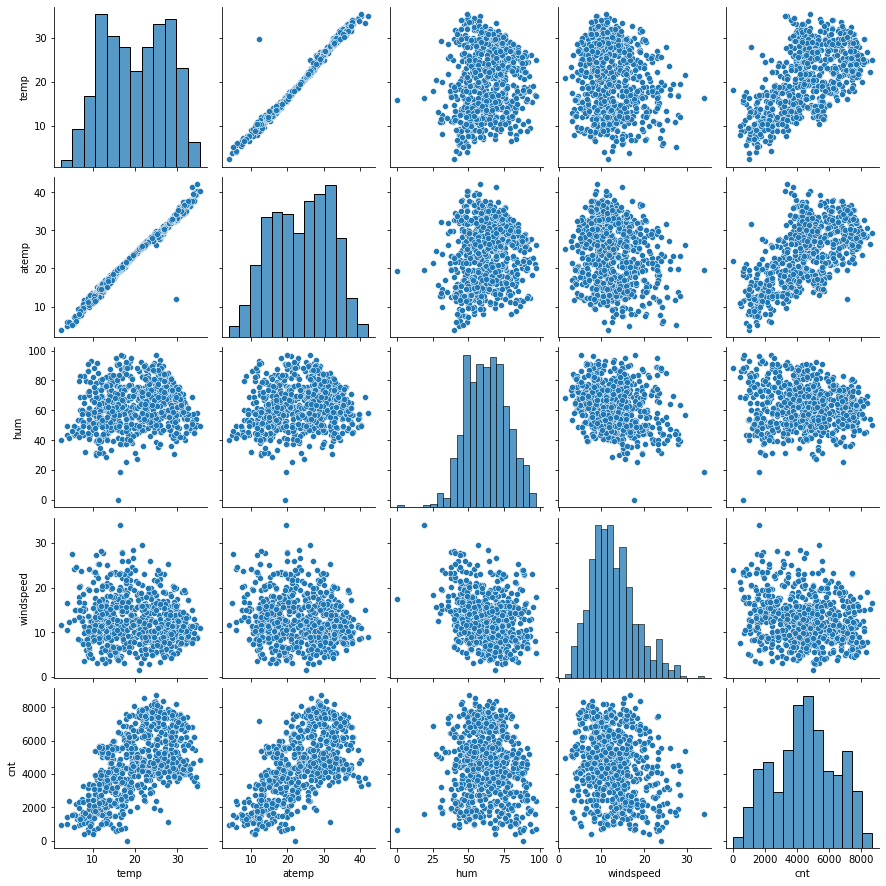

In [8]:
sns.pairplot(bike, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

<b>Observation</b>:
- bike rentals are more in higher temperature and higher humidity
- there is a direct corelation between atemp and temp 

### Pearson Correlation coefficient

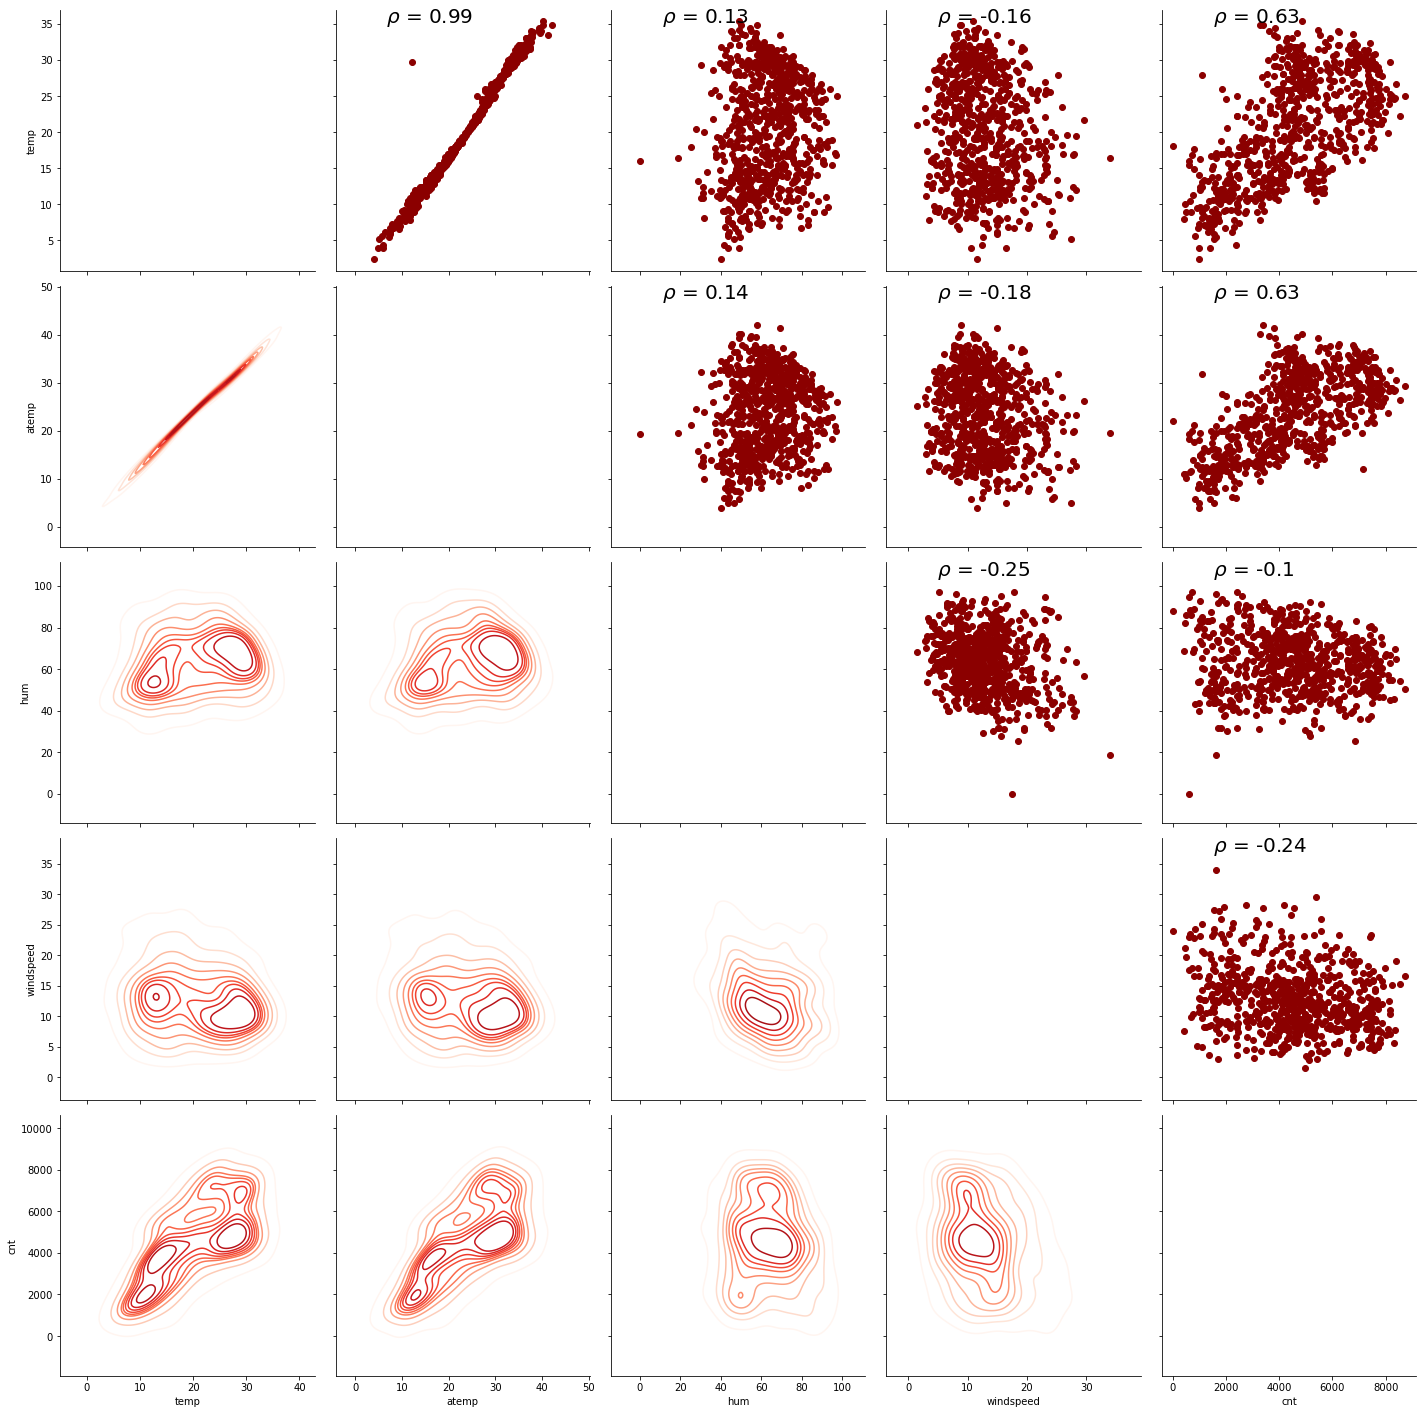

In [9]:
from scipy.stats import pearsonr

def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    
# Create a pair grid instance

grid = sns.PairGrid(data=bike, vars=['temp','atemp','hum','windspeed',"cnt"], size = 4)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');

<AxesSubplot:>

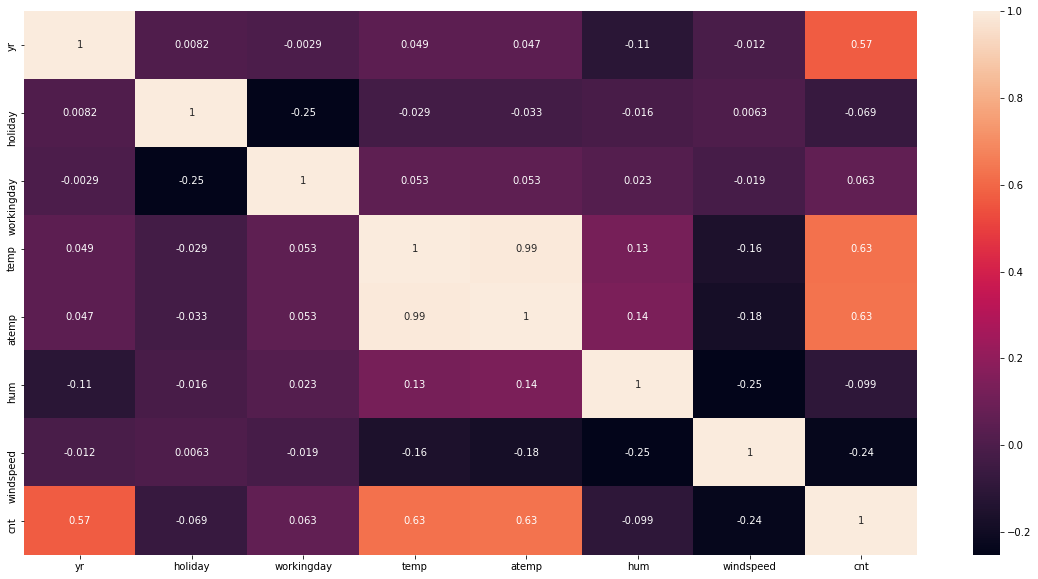

In [10]:
# heat map
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(bike.corr(),annot = True)

<b>Observation:</b> Again from heat map temp and atemp have corelation of .99 which is almost close to 1 and hence display similar information. So we can delete one of the 2 columns

In [11]:
# drop atemp column
bike.drop('atemp', axis=1, inplace=True)

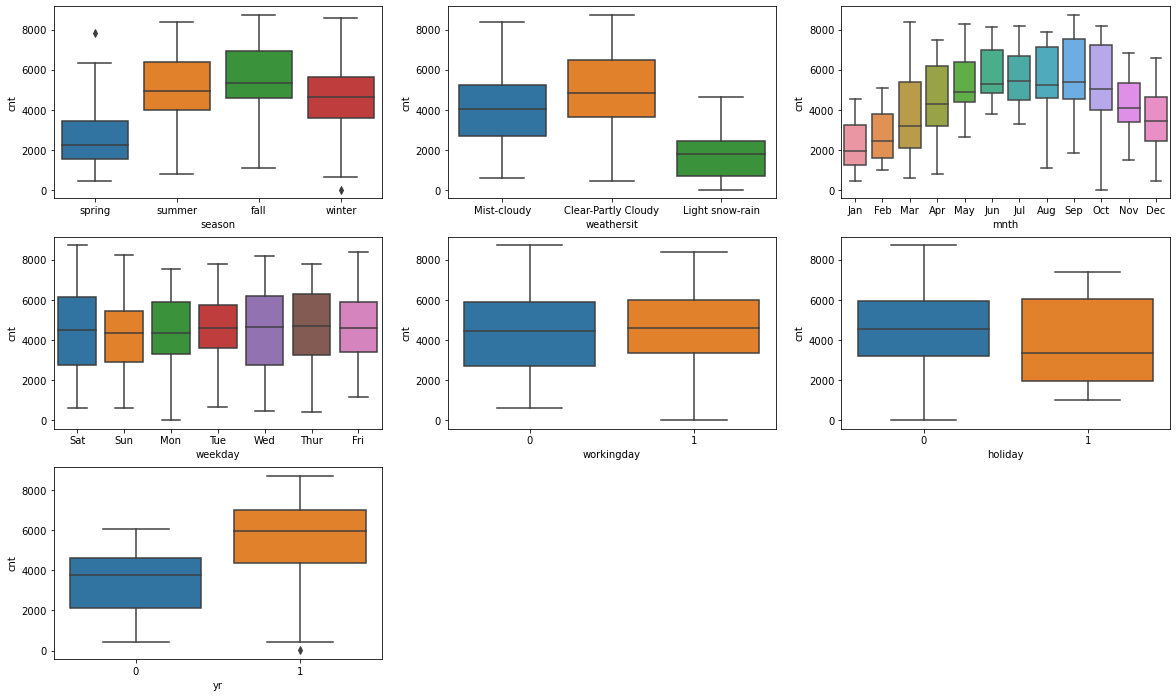

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

<b>Observation:</b> Bikes hiring trend:
- More in 2019 than in 2018
- Rented more in fall and summer than spring
- Bike rental count fell drastically in Light snow-rain

# creating dummy variables

In [13]:
bike['mnth']=bike['mnth'].astype(object)
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 88.4+ KB


In [14]:
season_cols=pd.get_dummies(bike['season'],drop_first=True)
weather_cols=pd.get_dummies(bike['weathersit'],drop_first=True)
weekday_cols=pd.get_dummies(bike['weekday'],drop_first=True)
mnth_cols=pd.get_dummies(bike['mnth'],drop_first=True)

In [15]:
# Add the results to the original dataframe
bike = pd.concat([bike, season_cols,weather_cols, weekday_cols, mnth_cols ], axis = 1)
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           730 non-null    object 
 1   yr               730 non-null    int64  
 2   mnth             730 non-null    object 
 3   holiday          730 non-null    int64  
 4   weekday          730 non-null    object 
 5   workingday       730 non-null    int64  
 6   weathersit       730 non-null    object 
 7   temp             730 non-null    float64
 8   hum              730 non-null    float64
 9   windspeed        730 non-null    float64
 10  cnt              730 non-null    int64  
 11  spring           730 non-null    uint8  
 12  summer           730 non-null    uint8  
 13  winter           730 non-null    uint8  
 14  Light snow-rain  730 non-null    uint8  
 15  Mist-cloudy      730 non-null    uint8  
 16  Mon              730 non-null    uint8  
 17  Sat             

In [16]:
# now we can drop the original categorical columns
bike.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)

In [17]:
# as noticed from data working day is related to holiday and weekday and hence can be dropped
bike.drop(["workingday"], axis = 1, inplace=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   temp             730 non-null    float64
 3   hum              730 non-null    float64
 4   windspeed        730 non-null    float64
 5   cnt              730 non-null    int64  
 6   spring           730 non-null    uint8  
 7   summer           730 non-null    uint8  
 8   winter           730 non-null    uint8  
 9   Light snow-rain  730 non-null    uint8  
 10  Mist-cloudy      730 non-null    uint8  
 11  Mon              730 non-null    uint8  
 12  Sat              730 non-null    uint8  
 13  Sun              730 non-null    uint8  
 14  Thur             730 non-null    uint8  
 15  Tue              730 non-null    uint8  
 16  Wed              730 non-null    uint8  
 17  Aug             

# Split data into test and train sets

In [18]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    int64  
 1   holiday          510 non-null    int64  
 2   temp             510 non-null    float64
 3   hum              510 non-null    float64
 4   windspeed        510 non-null    float64
 5   cnt              510 non-null    int64  
 6   spring           510 non-null    uint8  
 7   summer           510 non-null    uint8  
 8   winter           510 non-null    uint8  
 9   Light snow-rain  510 non-null    uint8  
 10  Mist-cloudy      510 non-null    uint8  
 11  Mon              510 non-null    uint8  
 12  Sat              510 non-null    uint8  
 13  Sun              510 non-null    uint8  
 14  Thur             510 non-null    uint8  
 15  Tue              510 non-null    uint8  
 16  Wed              510 non-null    uint8  
 17  Aug            

# rescaling features

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.describe()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,Light snow-rain,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

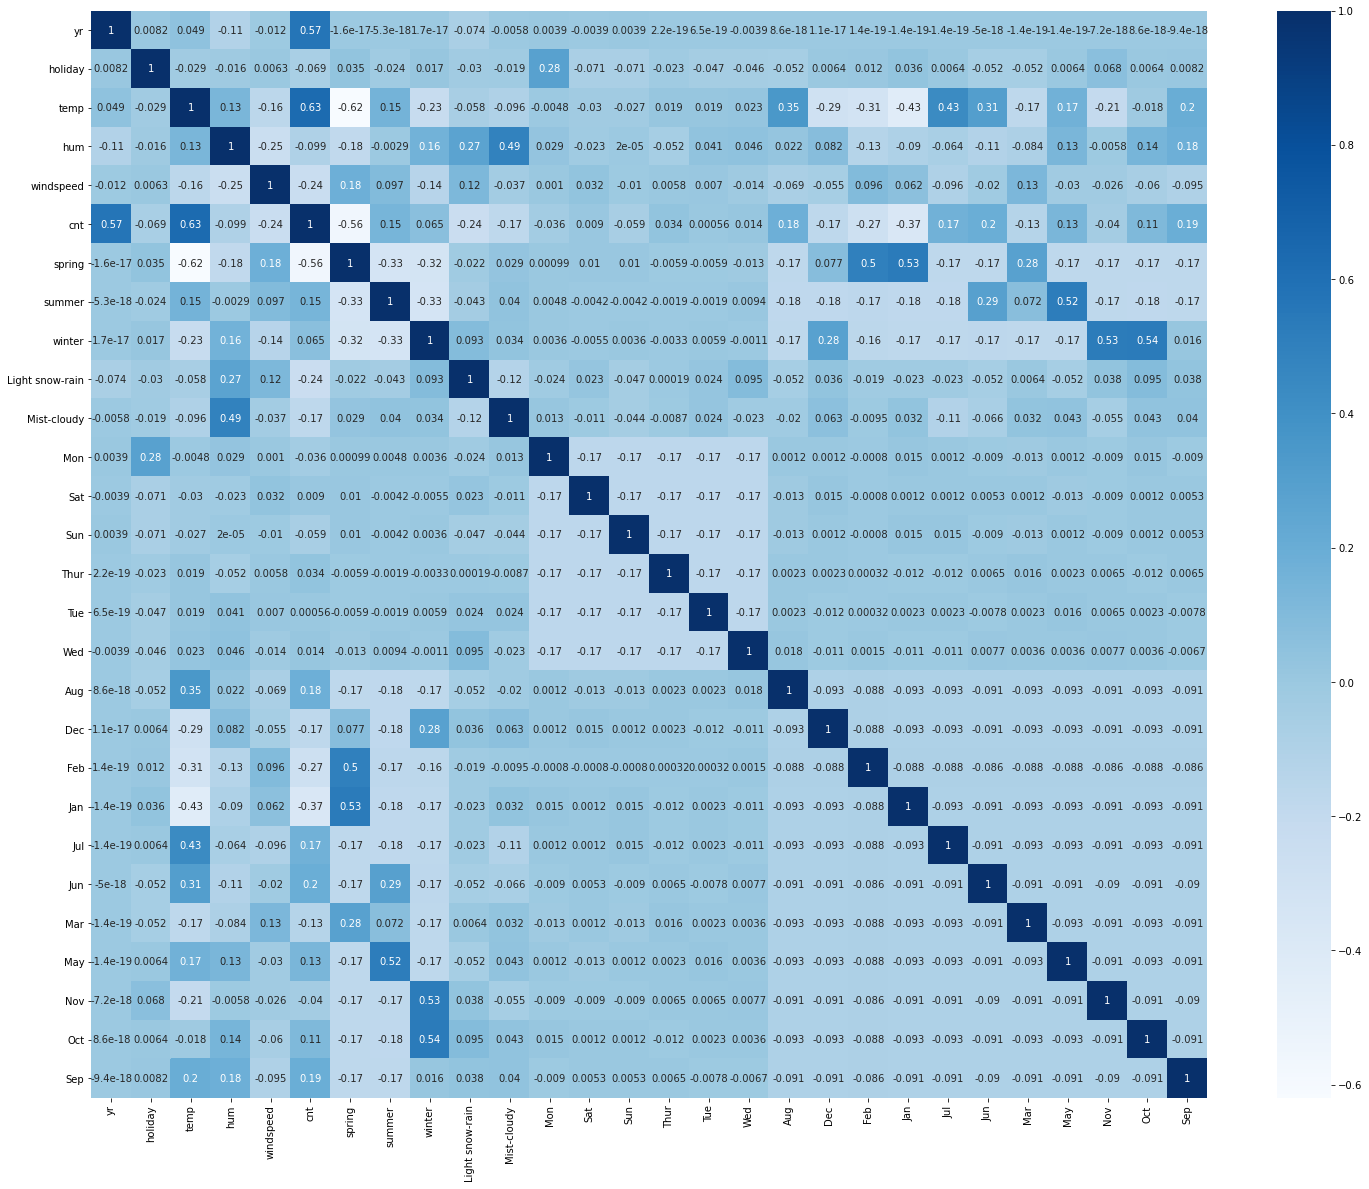

In [21]:
plt.figure(figsize = (25,20))        # Size of the figure
sns.heatmap(bike.corr(),annot = True,cmap='Blues')

# Dividing into X and Y sets for the model building

In [22]:
y_train = df_train.pop('cnt')
X_train = df_train

# RFE for feature selection

In [23]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [24]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [25]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light snow-rain', True, 1),
 ('Mist-cloudy', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 16),
 ('Sun', False, 2),
 ('Thur', False, 12),
 ('Tue', False, 10),
 ('Wed', False, 13),
 ('Aug', False, 8),
 ('Dec', False, 5),
 ('Feb', False, 6),
 ('Jan', False, 3),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', False, 4),
 ('Oct', False, 11),
 ('Sep', True, 1)]

In [26]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Light snow-rain', 'Mist-cloudy', 'Jul', 'Sep'],
      dtype='object')

In [27]:
X_train.columns[~rfe.support_]

Index(['Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jun', 'Mar', 'May', 'Nov', 'Oct'],
      dtype='object')

# Build model using statsmodel

### Model 1

In [28]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [29]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [30]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [31]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.69e-190
Time:                        19:30:48   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2841      0.034     

<b>Observation:</b>P value of all variables is well within acceptable range

In [32]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Light snow-rain', 'Mist-cloudy', 'Jul', 'Sep'],
      dtype='object')

In [33]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.06
2,temp,16.02
4,windspeed,4.65
5,spring,4.01
7,winter,3.35
6,summer,2.78
9,Mist-cloudy,2.28
0,yr,2.08
10,Jul,1.58
11,Sep,1.38


 <b>Observation:</b> VIF of hum is high (> 5) and hence this column can be dropped for the new model #2

### Model2 - dropping humidity

In [34]:
X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)

In [35]:
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.40e-187
Time:                        19:30:48   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1996      0.030     

In [36]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.21
4,spring,2.08
0,yr,2.07
6,winter,1.79
9,Jul,1.58
8,Mist-cloudy,1.55
10,Sep,1.34
7,Light snow-rain,1.08


<b>Observation:</b> VIF of temp is still > 5, but since temp is a major driving factor, next column eligible for dropping is 'Jul' 

### Model3 -dropping Jul

In [37]:
X_train_rfe = X_train_rfe.drop(["Jul"], axis = 1)

In [38]:
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          7.36e-187
Time:                        19:30:49   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1910      0.030     

In [39]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
4,spring,1.99
5,summer,1.89
6,winter,1.63
8,Mist-cloudy,1.54
9,Sep,1.23
7,Light snow-rain,1.08
1,holiday,1.04


<b>Observation</b>: Though now VIF and p value are well within the acceptable range, but we can check if further dropping Sep can further improve the regression model

So the final equation of the model is
    cnt =  0.1910 + (yr * 0.2341) + (holiday * -0.0969) + (temp * 0.4782) + 
            (windspeed * -0.1482) + (spring * -0.0551) + (summer * 0.0610) + 
            (winter * 0.0959) + (Light snow-rain * -0.2860) + (Mist-cloudy * -0.0801) + (Sep * 0.0909)

# Residual analysis

In [40]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

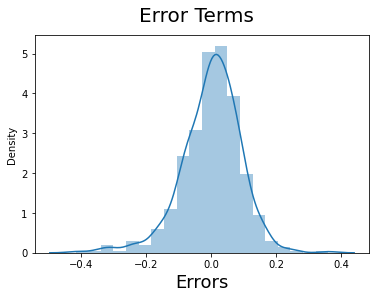

In [41]:
# to check if error terms are normally distributed
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Since the residuals are normally distributed, we can say that our linear regression assumption is valid. 

# Making Predictions

In [42]:
#### Applying the scaling on the test sets

In [43]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [44]:
y_test = df_test.pop('cnt')
X_test = df_test

In [45]:
# make predictions.

X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [46]:
# Making predictions
y_pred = lm.predict(X_test_new)

# ModelEvaluation

Text(0, 0.5, 'y_pred')

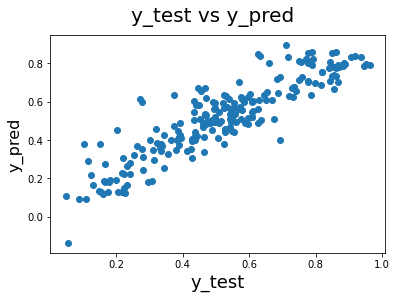

In [47]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# calculate the R-squared score on the test set

In [48]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8035441330582012

As we can see that the difference between R squared score on test and train set has less than 5% difference we can say that its a suffciently good model.
Also we can see from the above graph that there is a linear relationship between y test and y _pred which again reinforces the fact that the model fits the requirement